In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zlib
import json
import base64
# rootDir = ".\\AppData\\Local\\dash_early_access\\global_levels\\"
rootDir = "/Users/victorjupin/kode/DASHGAN/dash_early_access/global_levels/"

In [101]:
levels = os.walk(rootDir)
levels = levels.__next__()[2]

#for d in tmp:
#    print(rootDir + d)
def parseLevel(blob, x0=16, y0=16, n=32):
    lvlArr = np.zeros((n,n),dtype=np.int)
    xmin = int(x0 - n/2)
    xmax = int(x0 + n/2)
    ymin = int(y0 - n/2)
    ymax = int(y0 + n/2)
    for element in blob.decode().split('<sep_json>'):
        if len(element) == 0:
            continue
        if len(element) > 250:
            print(element)
            continue            
#         print(len(element))
        tmp = json.loads(element)
#         print(tmp['x']/32," ", tmp['y']/32)
        if tmp['x'] in range(xmin * 32, xmax * 32) and tmp['y'] in range(ymin * 32, ymax * 32):
            lvlArr[int(tmp['x']/32-xmin), int(tmp['y']/32 - ymin)] = int(tmp['tileType'])
#             print("hit! ", tmp['tileType'])
    return lvlArr

/Users/victorjupin/kode/DASHGAN/dash_early_access/global_levels/peaceful place.sav


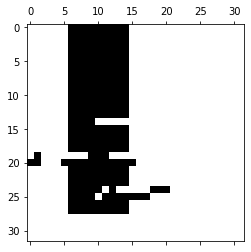

In [106]:
filename = rootDir + levels[7]
print(filename)
with open(filename, "rb") as f:
    bytes_read = f.read()
tmp = base64.b64decode(bytes_read)

blob = zlib.decompress(tmp)
lvlArr = np.zeros((100,100),dtype=np.uint)
X = parseLevel(blob)

plt.spy(X.T)
plt.show()